In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline


In [2]:
data = pd.read_csv('diabetes.csv')
num_fts = data[['BMI', 'Glucose', 'BloodPressure', 'Insulin']]

In [3]:
from process_data import clean_data

cleaned_df = clean_data(num_fts, data)
cleaned_df.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,BMI,Glucose,BloodPressure,Insulin
0,6,0.627,50,1,33.6,148.0,72.0,125.0
1,1,0.351,31,0,26.6,85.0,66.0,125.0
2,8,0.672,32,1,23.3,183.0,64.0,125.0
3,1,0.167,21,0,28.1,89.0,66.0,94.0
4,0,2.288,33,1,43.1,137.0,40.0,168.0


In [4]:
from process_data import scale_data

scaled_df = scale_data(cleaned_df)
scaled_df

,0,1,2,3,4,5,6
0,0.639947,0.468492,1.425995,0.166619,0.866045,-0.031990,-0.181541
1,-0.844885,-0.365061,-0.190672,-0.852200,-1.205066,-0.528319,-0.181541
2,1.233880,0.604397,-0.105584,-1.332500,2.016662,-0.693761,-0.181541
3,-0.844885,-0.920763,-1.041549,-0.633881,-1.073567,-0.528319,-0.540642
4,-1.141852,5.484909,-0.020496,1.549303,0.504422,-2.679076,0.316566
...,...,...,...,...,...,...,...
763,1.827813,-0.908682,2.532136,0.064737,-0.679069,0.298896,0.455573
764,-0.547919,-0.398282,-0.531023,0.632365,0.011301,-0.197433,-0.181541
765,0.342981,-0.685193,-0.275760,-0.910418,-0.021574,-0.031990,-0.332132
766,-0.844885,-0.371101,1.170732,-0.342790,0.142800,-1.024647,-0.181541


## Train/Test split:

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = scaled_df
y = data['Outcome']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


## Building model: KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [9]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

## Evaluation model:

In [10]:
predictions = knn.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[76 23]
 [24 31]]


In [12]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.76      0.77      0.76        99
           1       0.57      0.56      0.57        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



### Let's break down the significance of the confusion matrix and classification report from above:


### Confusion Matrix
The confusion matrix breakds down the way our model classified the data into four different classes: 

True Positive (TP): Model predicted positive diabetes outcome, correctly.</br>
False Positive (FP): Model Predicted positive diabetic outcome, incorrectly.</br>
True Negative (TN): Model predicted negative diabetes outcome, correctly.</br>
False Negative (FN): Model predicated negative diabetes outcome, incorrectly.</br>

                     Predicted
                     
                       1    0
     
                   1   TP | FN (Recall)
         Actual
                   0   FP | TN
                 (Precision)

Our model classified:
* 76 True negative
* 77 False positive
* 57 False negative
* 56 True Positive


### Classification Report 
**Precision** measures our model's ability to correctly distinguish positive outcomes. Meaning, out of all the values that our model classified as positive, how many of them were actually positive?

Precision = TP/TP+FP = 79/79+20 = 79/99 = 0.7979% 
This means that out of all the positive classifications our model made, about 80% of them were positive diabetic outcomes. 
*Looks at the positive class* 

**Recall** measures the correct positive predictions our model made out of all the positive cases. In other words, it takes all of the positive cases in the dataset, and measures our model's predicted cases against the total number of positive cases (True Positives and False Negatives).

Recall = TP/TP+FN = 79/79+23 = 79/102 = 0.7745%
This means that our model can classify positive diabetes instances about 77% of the time. To compute this, we measure the True Positive diabetes cases over the total number of actual positive cases found in the dataset, including the False Negatives that our model didn't classify as positive.
*Looks at actual positive cases*


Which one of these measures is most important? The answer to this question varies on the problem and the most important piece of knowledge that you can get from the model. For example, in this case, the most important factor is determining who has diabetes. Therefore, our priority is to focus on correct diabetes classifications, and false negatives (those the model said that didn't have diabetes but did). These are the most important classes because early intervention efforts produce better patient outcomes. 

In other words, we need to know who is diabetic so we can provide the appropriate attention and care. If our model identifies a few people as diabetic that didn't end up having diabetes, it's not a big deal since it's better to be safe than sorry for in a harm reduction approach (Recall). On the other hand, our model can be quite efficient if it correctly detects a high number of diabetic patients out of all of the patients it assigns to the positive class (Precision). How can we find a balance between the two?
 

**F1-score**
F1-scores combines both Precision and Recall to evaluate the model's performance. It is the harmonic mean of both Precision and Recall, and comes in useful when it is important for us to find a balance between the two. 

F-score = 2*(precision * recall) / (precision + recall). 


In our case, a balance would be nice but high recall would be better. Let's see if we can achieve higher recall in our model by changing the K value.

## Choosing K value:
Plotting errors to find a good *K* value: Our goal is to find the K value that produces the least amount of errors

In [13]:
from sklearn import metrics

errors = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    errors.append(np.mean(predictions != y_test))

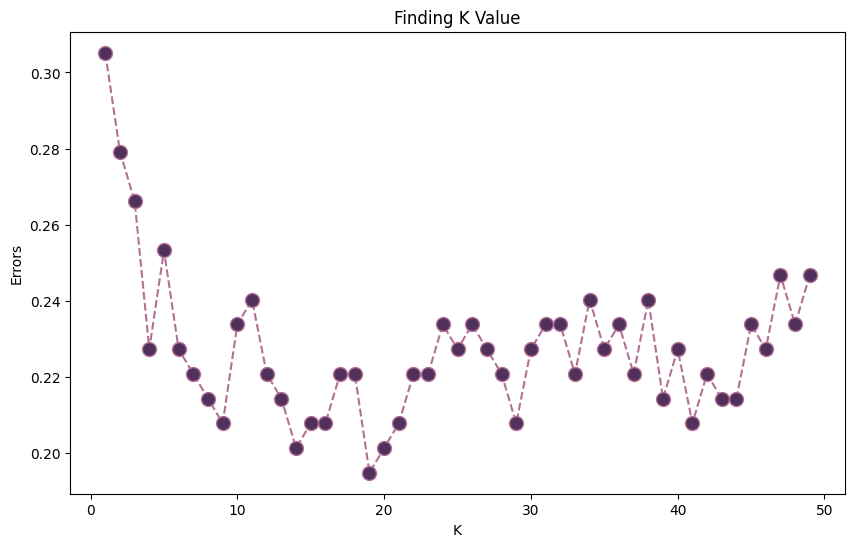

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(range(1,50), errors, color='#B47094', linestyle='dashed', marker='o',
         markerfacecolor='#4F315C', markersize=10)
plt.title('Finding K Value')
plt.xlabel('K')
plt.ylabel('Errors');

The figure above demonstrates the least amount of errors when K=18. Let's change K to 18 and evaluate the model's performance

In [15]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [16]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[93  6]
 [28 27]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        99
           1       0.82      0.49      0.61        55

    accuracy                           0.78       154
   macro avg       0.79      0.72      0.73       154
weighted avg       0.79      0.78      0.76       154



## KNN Conclusion:

As shown in the confusion matrix, and classification report above, we managed to increase recall from 80% to ~95% for our 0 class, while keeping precision for 1 class at around 84%, and the f1-score at 85% for the 0 class. As we mentioned earlier, our goal was to aim for a higher recall for harm reduction, even if it meant losing a little bit of precision. 

What this means for our project is that our model has gotten better at identifying non-positive diabetic patients in the whole dataset. However, our model performs poorly when identifying positive diabetes cases. Let's test out other classification models and see how they perform. 

# Conclusion:


Our initial goal was to create a model that performed well at classifying positive diabetes cases. As we can see, all of our models performed better at detecting patients who **did not** have diabetes (those in class 0). 

If we revisit the distribution of our two classes, we can see that there were a lot more rows consisting of patients who did not have diabetes vs those who did, meaning that our model had better data/information on patients who did not have diabetes. 


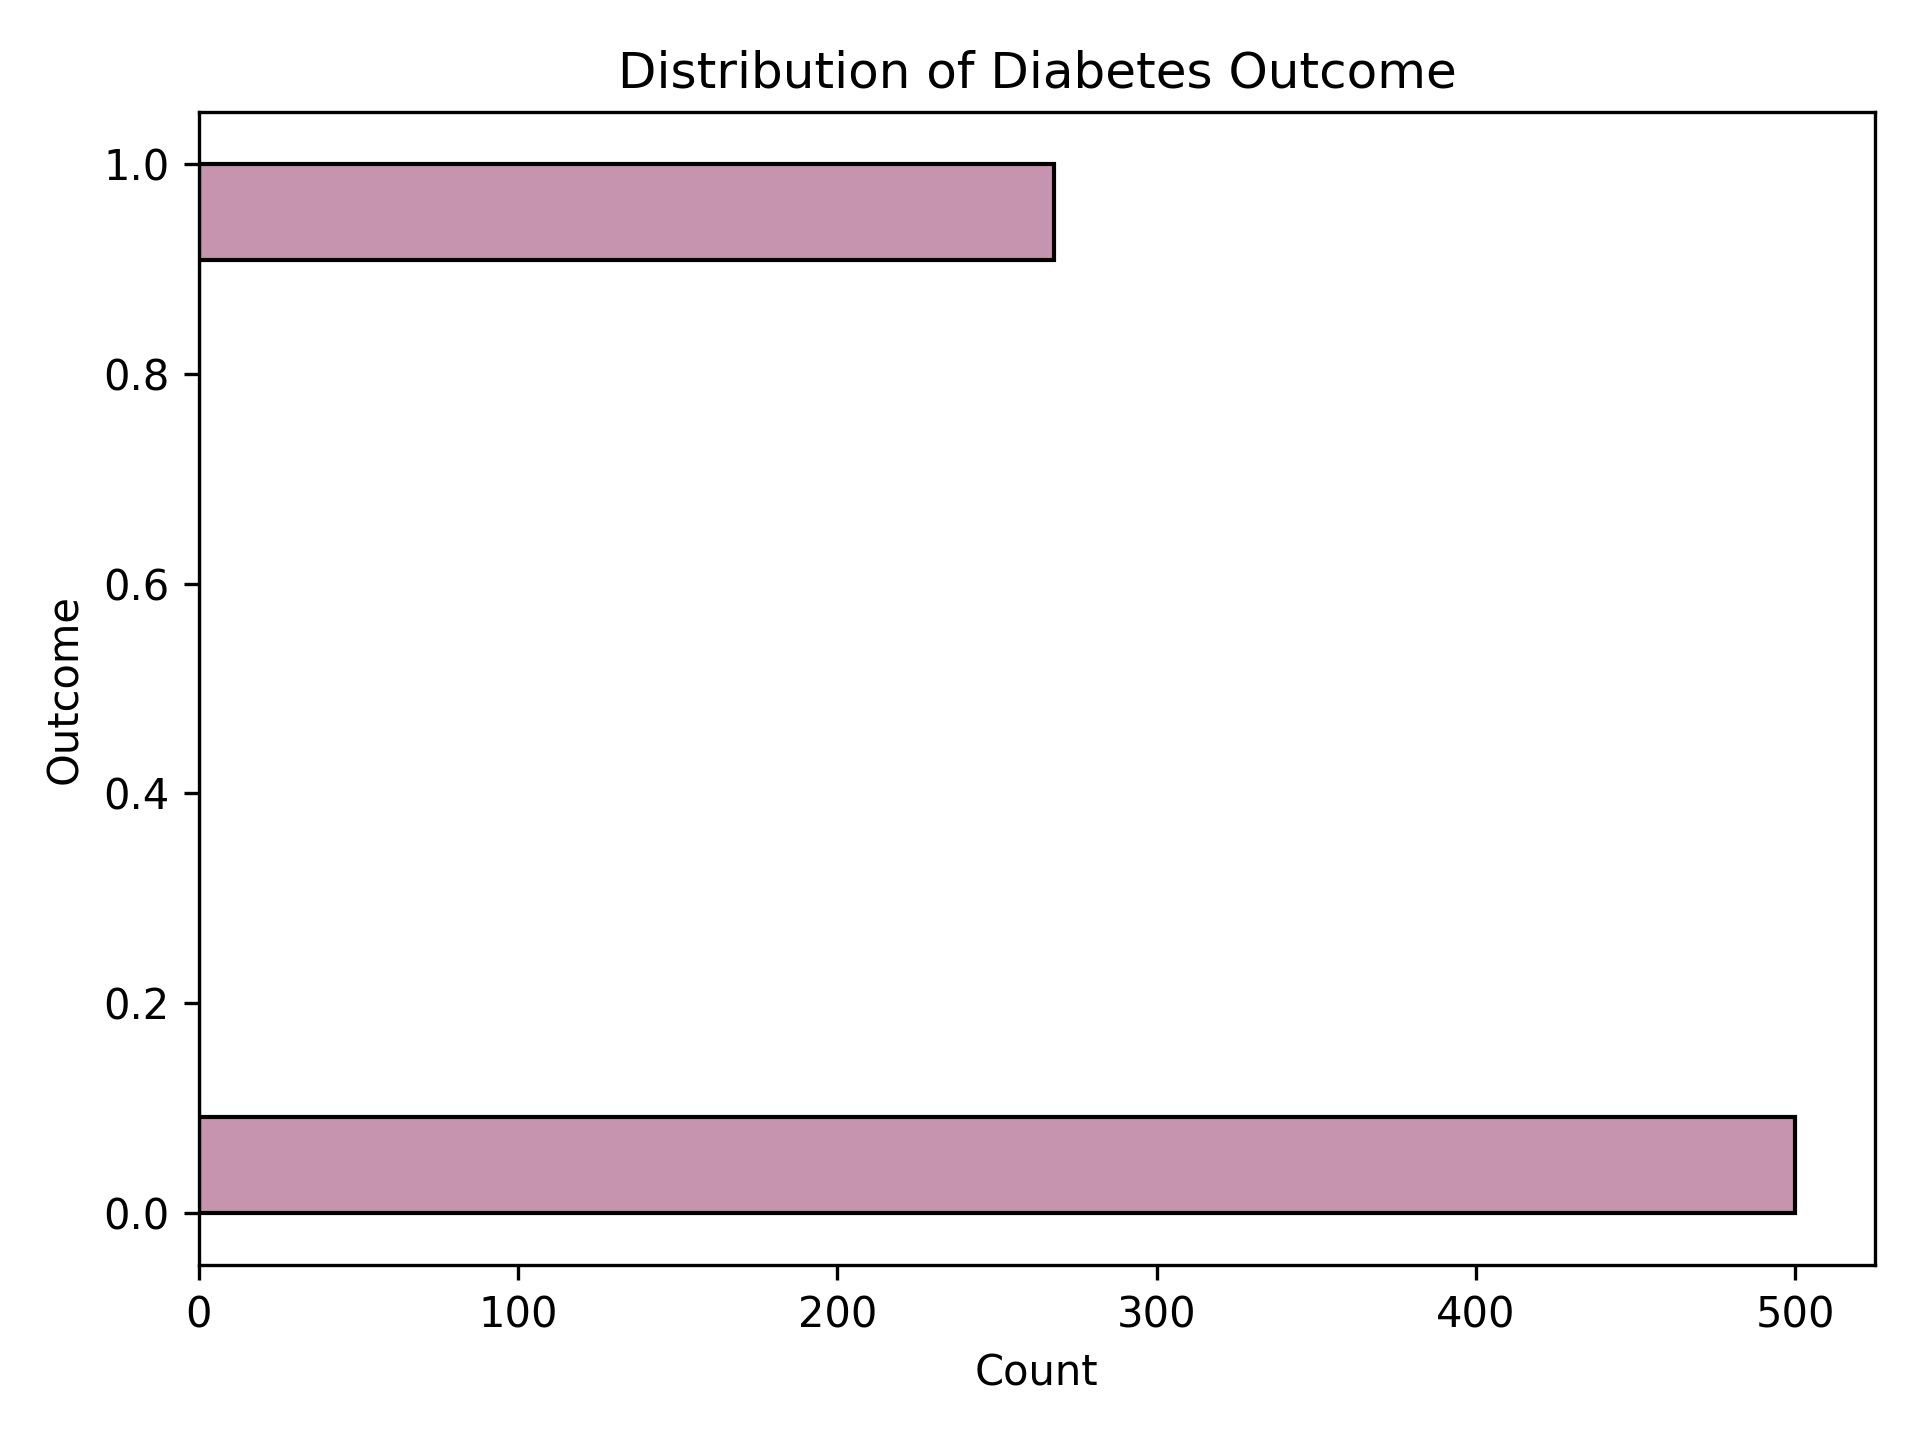


In order to achieve our goal, we would need to balance our data so that our models have a fair chance at learning and identifying both classes equally. With that being said, our KNN model with n-neighbors set to 18 performed the best at identifying cases with no diabetes. We determiend that we were more concerned with a model that provided a higher recall over precision. The results for that model ended up being ~ 94% for recall. 

This concludes our Diabetes Classification with KNN project. Some of the ways that we can expand on this project are: 

* Balanceing our data so that both classes of the outcome are equally represented.
* Find and train our models with more data.

References: [[10]](https://towardsdatascience.com/confusion-matrix-and-class-statistics-68b79f4f510b)
[[11]](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
[[12]](https://medium.com/codex/diabetes-predication-system-with-knn-algorithm-e040999229f7)
[[13](https://pub.towardsai.net/5-steps-to-build-a-knn-classifier-d0fd102b28b5)